In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib
font = {'family':'Osaka'}
matplotlib.rc('font', **font)

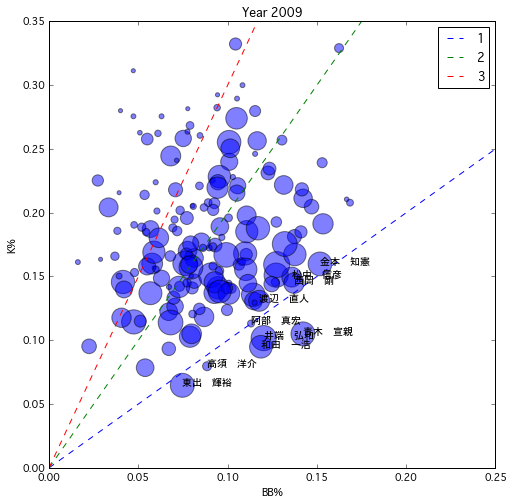

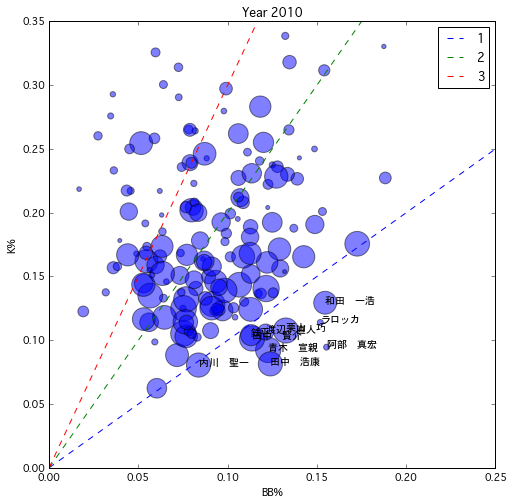

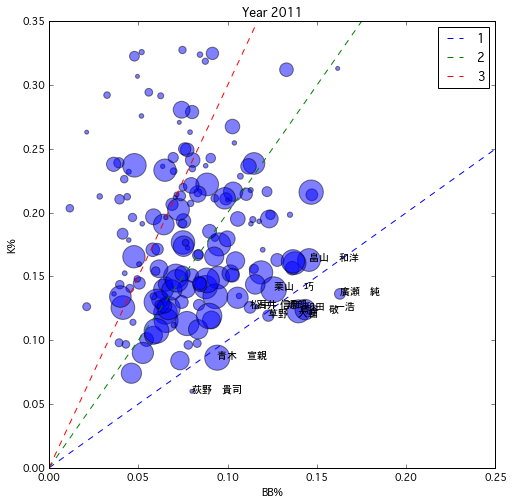

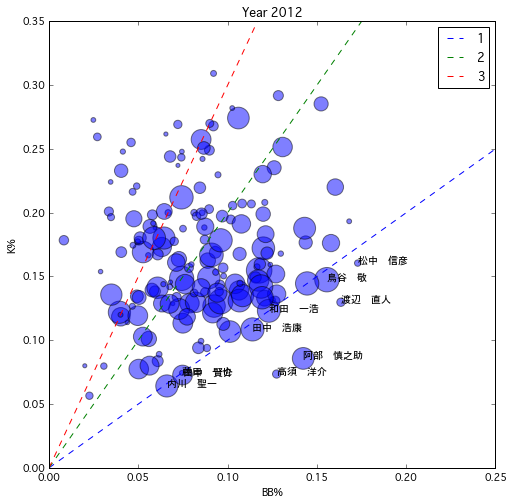

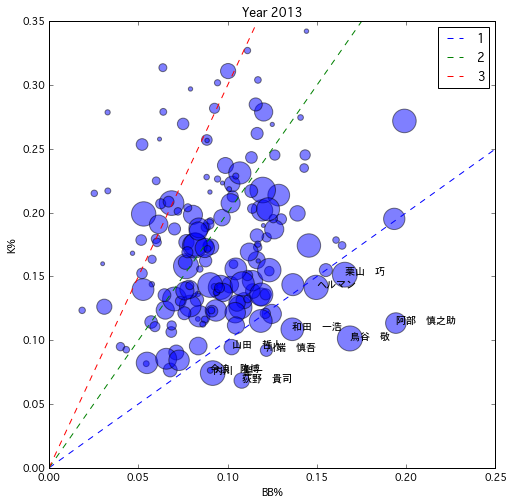

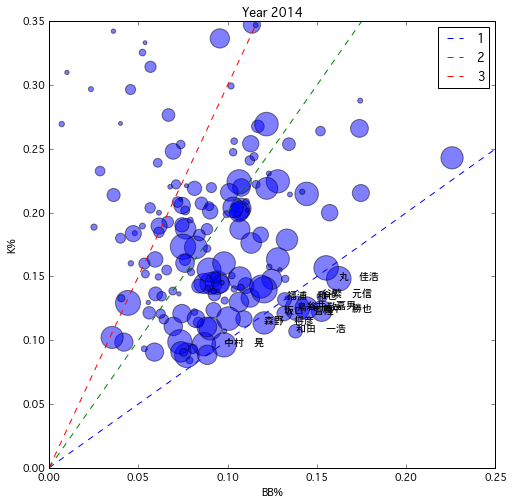

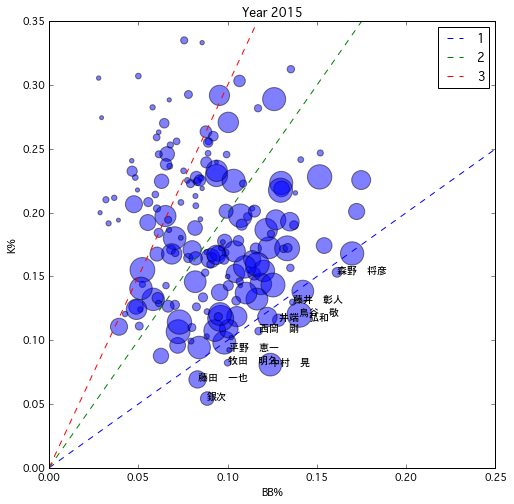

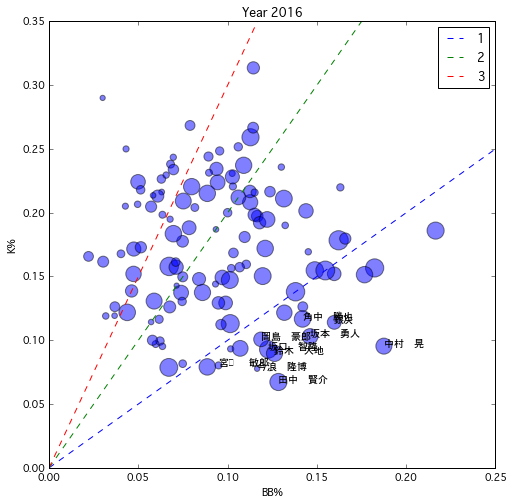

In [95]:
for y in range(2009,2017):
    df_h = pd.read_csv('../data/hitter_stats_{0}.csv'.format(y))
    df_h.head()

    df_h = df_h.dropna()

    df_h['IsoP'] = df_h['長打率'] - df_h['打率']
    df_h['IsoD'] = df_h['出塁率'] - df_h['打率']
    df_h['Bp'] = (df_h['四球'] + df_h['死球']) / (df_h['打席数']-df_h['敬遠']-df_h['犠打'])
    df_h['Kp'] = (df_h['三振']) / (df_h['打席数']-df_h['敬遠']-df_h['犠打'])
    df_h['kpbb'] = df_h['三振'] / (df_h['四球'] + df_h['死球']) 

    fig,ax = plt.subplots(1,1,figsize=(8,8))
    xx = np.linspace(0,.3,10)
    for a in range(1,4):
        ax.plot(xx,xx*a,'--',label=str(a))
    ax.set_xlabel('BB%')
    ax.set_ylabel('K%')
    ax.set_xlim(0,.25)
    ax.set_ylim(0,0.35)
    ax.legend()
    
    idx = df_h['打席数'] >= 100
    max_ab = max(df_h['打席数'])
    ax.scatter(df_h.Bp[idx],df_h[idx].Kp,s=df_h[idx]['打席数']**2 / max_ab,alpha=.5)

    df_bhd = df_h[idx].sort_values(by='kpbb',ascending=True).head(10)
    for i,rw in df_bhd.iterrows():
        ax.annotate(rw['選手名'],xy=(rw['Bp'],rw['Kp']))
    ax.set_title('Year {0}'.format(y))
    fig.savefig('batting_kp_bp_year={0}.png'.format(y),dpi=100)

In [70]:
df_all_bat = None
for y in range(2009,2017):
    df_h = pd.read_csv('../data/hitter_stats_{0}.csv'.format(y))
    df_h['year'] = y
    df_h['IsoP'] = df_h['長打率'] - df_h['打率']
    df_h['IsoD'] = df_h['出塁率'] - df_h['打率']
    df_h['Bp'] = (df_h['四球'] + df_h['死球']) / (df_h['打席数']-df_h['敬遠']-df_h['犠打'])
    df_h['Kp'] = (df_h['三振']) / (df_h['打席数']-df_h['敬遠']-df_h['犠打'])
    df_h['kpbb'] = df_h['三振'] / (df_h['四球'] + df_h['死球']) 
    if df_all_bat is None:
        df_all_bat = df_h
    else:
        df_all_bat = df_all_bat.append(df_h)

In [156]:
df_all_bat[df_all_bat['打席数']>=200].sort_values(by='kpbb',ascending=False).head(10)

,Team,背番号,選手名,打率,試合,打席数,打数,得点,安打,二塁打,...,三振,併殺打,長打率,出塁率,year,IsoP,IsoD,Bp,Kp,kpbb
9,広,10,岩本 貴裕,0.268,71.0,242.0,239.0,21.0,64.0,15.0,...,43.0,5.0,0.406,0.274,2012,0.138,0.006,0.008299,0.178423,21.500000
9,広,10,岩本 貴裕,0.259,61.0,220.0,212.0,29.0,55.0,7.0,...,57.0,4.0,0.500,0.279,2010,0.241,0.020,0.027397,0.260274,9.500000
81,阪,67,ブラゼル,0.291,82.0,295.0,285.0,29.0,83.0,14.0,...,66.0,13.0,0.509,0.308,2009,0.218,0.017,0.027304,0.225256,8.250000
8,広,66,木村 昇吾,0.261,101.0,253.0,238.0,25.0,62.0,6.0,...,57.0,3.0,0.324,0.280,2014,0.063,0.019,0.028571,0.232653,8.142857
110,中,45,グスマン,0.181,73.0,251.0,238.0,15.0,43.0,7.0,...,81.0,7.0,0.298,0.219,2011,0.117,0.038,0.047809,0.322709,6.750000
313,西,2,銀仁朗,0.218,122.0,365.0,317.0,20.0,69.0,7.0,...,79.0,6.0,0.265,0.244,2011,0.047,0.026,0.036145,0.237952,6.583333
78,阪,44,梅野 隆太郎,0.197,92.0,265.0,249.0,23.0,49.0,13.0,...,78.0,7.0,0.349,0.232,2014,0.152,0.035,0.045627,0.296578,6.500000
252,日,64,鶴岡 慎也,0.236,105.0,284.0,254.0,21.0,60.0,12.0,...,32.0,6.0,0.319,0.248,2010,0.083,0.012,0.019157,0.122605,6.400000
146,横,52,石川 雄洋,0.242,134.0,495.0,463.0,38.0,112.0,15.0,...,98.0,8.0,0.300,0.267,2009,0.058,0.025,0.033333,0.204167,6.125000
215,ソ,27,細川 亨,0.201,97.0,264.0,219.0,16.0,44.0,7.0,...,55.0,1.0,0.256,0.230,2011,0.055,0.029,0.039130,0.239130,6.111111


In [139]:
sns.color_palette("Paired")

[(0.65098041296005249, 0.80784314870834351, 0.89019608497619629),
 (0.12572087695201239, 0.47323337360924367, 0.707327968232772),
 (0.68899655751153521, 0.8681737867056154, 0.54376011946622071),
 (0.21171857311445125, 0.63326415104024547, 0.1812226118410335),
 (0.98320646005518297, 0.5980161709820524, 0.59423301088459368),
 (0.89059593116535862, 0.10449827132271793, 0.11108035462744099)]

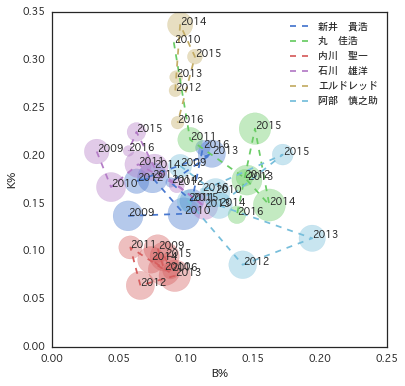

In [163]:
bp = df_all_bat.groupby(['year','選手名'],as_index=False).sum()
colors = sns.color_palette('muted')
sns.set_style('white')
names = ['新井　貴浩','丸　佳浩','内川　聖一','石川　雄洋','エルドレッド','阿部　慎之助']
font = {'family':'Osaka'}
matplotlib.rc('font', **font)

plt.figure(figsize=(6,6))
for i,name in enumerate(names):
    df_named = bp[bp['選手名']==name]
    plt.plot(df_named['Bp'],df_named['Kp'],'--',label=name,color=colors[i])
    plt.scatter(df_named['Bp'],df_named['Kp'],s=df_named['打席数']**2 / 400,color=colors[i],alpha=.4,label=None)
    for i,rw in df_named.iterrows():
        plt.annotate('{0}'.format(rw['year']),xy=(rw['Bp'],rw['Kp']),size=10)
plt.xlim(0,.25)
plt.ylim(0,.35)
plt.xlabel('B%')
plt.ylabel('K%')
plt.legend()
plt.savefig('kp_bbp.png',dpi=100)

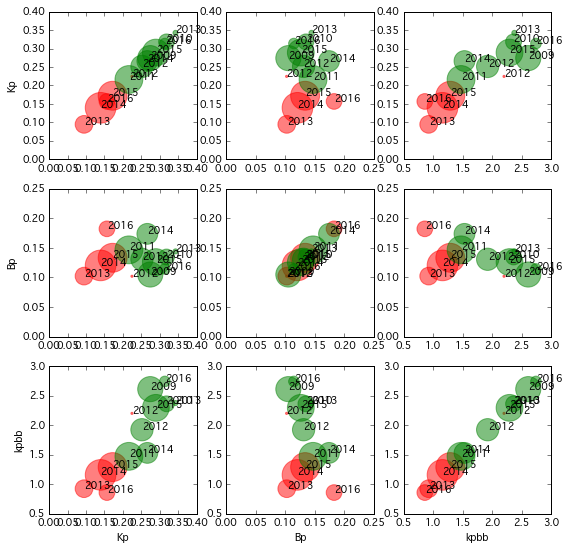

In [135]:
names = ['山田　哲人','中村　剛也']
params = ['Kp','Bp','kpbb']
colors = 'rgb'
fig,axs = plt.subplots(len(params),len(params),figsize=(9,9))
for i,param_i in enumerate(params):
    for j,param_j in enumerate(params):
        
        for k,name in enumerate(names):
            df_named = bp[bp['選手名']==name]
            x = df_named[param_j]
            y = df_named[param_i]
            size = df_named['打席数']**2 / 500
            axs[i,j].scatter(x,y,s=size,label=None,alpha=.5,color=colors[k])
            if j == 0:
                axs[i,j].set_ylabel(param_i)
            if i == len(params)-1:
                axs[i,j].set_xlabel(param_j)
            for l,rw in df_named.iterrows():
                axs[i,j].annotate('{0}'.format(rw['year']),xy=(rw[param_j],rw[param_i]))

In [189]:
import sklearn.cluster as cls
import kmeans

In [183]:
km = cls.KMeans(n_clusters=,)

In [184]:
bp = bp.dropna()

In [192]:
x = bp[['Kp','Bp']].values
km.fit(x)

AttributeError: module 'kmeans' has no attribute 'fit'

In [193]:
x

array([[ 0.33333333,  0.125     ],
       [ 0.2173913 ,  0.08695652],
       [ 0.17724289,  0.08533917],
       ..., 
       [ 0.24137931,  0.03448276],
       [ 0.11643836,  0.06164384],
       [ 0.23383085,  0.06965174]])

In [197]:
weight = bp['打席数'].values

In [199]:
X = [(x[i],weight[i]) for i in range(len(x))]

In [201]:
kmeans.kmeans(points=X,k=4)

ValueError: not enough values to unpack (expected 3, got 2)

In [196]:
[]
points[0]

array([[ 0.33333333,  0.125     ],
       [ 0.2173913 ,  0.08695652],
       [ 0.17724289,  0.08533917],
       ..., 
       [ 0.24137931,  0.03448276],
       [ 0.11643836,  0.06164384],
       [ 0.23383085,  0.06965174]])

In [186]:
bp['class'] = km.predict(x)

(0, 0.35)

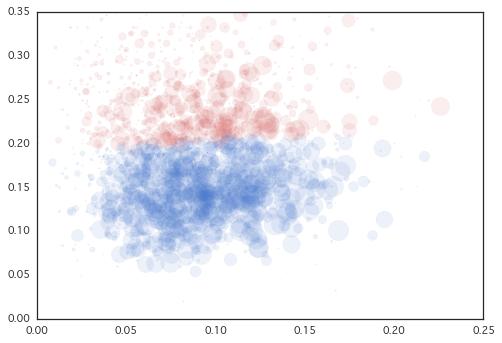

In [187]:
for i,rw in bp.iterrows():
    x = rw['Bp']
    y = rw['Kp']
    s = rw['打席数']**2 / 1000
    _cls = rw['class']
    plt.scatter(x,y,s,alpha=.1,color=colors[_cls])
plt.xlim(0,0.25)
plt.ylim(0,0.35)